## KNN Classifier
The model predicts the severity of the landslide (or if there will even be one) within the next 2 days, based on weather data from the past 5 days.
Binary Classification yielded a maximum accuracy of 77.53%. Severity Classification (multiple classes) was around 56%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.utils import shuffle
import pickle

In [2]:
df = pd.read_csv("dataset.csv")
len(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


17808

In [3]:
df['severity'].value_counts()

medium          5594
small           2612
unknown          834
large            679
...              359
very_large       102
Medium            72
Unknown           19
Large             17
Small             10
catastrophic       4
landslide          2
Very...large       1
Very_large         1
Name: severity, dtype: int64

In [4]:
# filter by severity. na is for non-landslide data
# df = df[df['severity'].isin(["medium", "small", "large", "very_large", "na"])]
# Remove -1 slopes
# df = df.loc[~(df.slope == -1)]
print(len(df))
print(df.forest.value_counts())

17808
1.0    9946
0.0     360
Name: forest, dtype: int64


In [5]:
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
print(len(df))
df

17808


,Unnamed: 0,id,date,lat,lon,country,fatalities,injuries,type,trigger,...,ARI7,ARI6,ARI5,ARI4,ARI3,ARI2,ARI1,ARI0,slope,osm
0,823,1375,6/7/13,49.157300,13.955300,Czech_Republic,0.0,0.0,landslide,rain,...,2.098298,8.072017,8.501429,5.913268,2.592307,1.259383,0.864167,0.914229,6.820,34473
1,2157,12298,6/6/10,52.952300,-1.127700,United_Kingdom,0.0,0.0,landslide,downpour,...,0.453269,0.243345,0.642144,0.199532,0.103133,0.197335,0.455656,1.651336,1.425,3953
2,4999,3200,12/17/12,45.531700,-122.252600,United_States,0.0,0.0,landslide,unknown,...,0.450544,1.778590,1.171179,0.405435,1.183816,1.617398,2.019064,4.072384,21.527,6510
3,3571,3333,1/24/10,35.132800,-85.318600,United_States,0.0,0.0,mudslide,downpour,...,5.657358,1.537417,0.715668,2.332985,7.695845,2.801887,1.159560,15.930287,7.307,7144
4,16337,116448,2/21/14,-24.694400,141.874100,NaN,NaN,NaN,NaN,NaN,...,0.014699,0.075680,1.143672,0.290309,0.196574,0.221756,0.087240,0.051419,1.508,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,1930,5961,3/26/11,44.436600,-121.939900,United_States,0.0,0.0,landslide,unknown,...,1.539103,1.916469,1.193686,0.648464,1.548352,2.994672,1.579461,1.978447,10.854,2551
17804,12042,15211,10/3/11,55.910100,118.739400,NaN,NaN,NaN,NaN,NaN,...,1.080392,0.297659,0.141994,0.084061,0.055887,0.159854,0.053322,0.014699,11.798,652
17805,2835,8701,8/4/17,39.795619,-110.932131,United_States,0.0,0.0,rock_fall,unknown,...,0.238201,0.144608,0.618466,0.190665,0.065659,0.037123,0.021167,0.014699,16.872,34111
17806,9501,10162,4/8/17,33.408320,75.205962,India,0.0,0.0,landslide,continuous_rain,...,0.452037,0.889916,0.400237,1.351499,1.777104,26.463140,7.469622,3.811233,31.121,9419


In [17]:
import random
X = []
y = []
days = dict()
for idx, row in df.iterrows():
#     lastday = random.randint(6, 9)
    lastday = random.randint(12, 15)
    if row.landslide == 1:
        y.append(lastday-4)
    else:
        y.append(-1)
    temp=[]
    if lastday in days:
        days[lastday] +=1
    else:
        days[lastday] = 0
    for i in range(10):
        temp.append(row['humidity' + str(lastday-i)])
        temp.append(row['precip' + str(lastday-i)])
        temp.append(row['wind' + str(lastday-i)])
    temp.append(row['slope'])
    temp.append(row['forest2'])
    temp.append(row['osm'])
    X.append(temp)
print(days)

{13: 4557, 15: 4322, 14: 4451, 12: 4474}


In [18]:
X

[[99,
  0.9,
  8,
  99,
  4.7,
  26,
  99,
  2.7,
  20,
  99,
  0.6,
  11,
  99,
  1.6,
  12,
  99,
  4.8,
  13,
  100,
  1.5,
  11,
  99,
  11.0,
  15,
  100,
  9.5,
  20,
  99,
  5.0,
  12,
  6.82,
  1,
  34473],
 [98,
  0.0,
  10,
  96,
  0.0,
  12,
  91,
  0.0,
  13,
  99,
  0.0,
  17,
  94,
  0.1,
  10,
  97,
  0.1,
  19,
  98,
  0.0,
  15,
  100,
  1.9,
  16,
  98,
  0.2,
  31,
  87,
  0.1,
  17,
  1.425,
  1,
  3953],
 [95,
  1.1,
  21,
  96,
  4.2,
  16,
  98,
  0.9,
  12,
  97,
  1.5,
  20,
  100,
  2.7,
  19,
  99,
  0.6,
  9,
  99,
  0.3,
  10,
  96,
  0.2,
  9,
  98,
  2.4,
  15,
  99,
  1.0,
  15,
  21.526999999999997,
  1,
  6510],
 [94,
  0.1,
  22,
  87,
  0.0,
  16,
  76,
  0.0,
  6,
  81,
  0.0,
  11,
  95,
  3.8,
  23,
  99,
  7.6,
  22,
  97,
  0.0,
  14,
  98,
  0.0,
  12,
  98,
  2.9,
  14,
  98,
  10.5,
  30,
  7.307,
  1,
  7144],
 [54,
  0.0,
  29,
  49,
  0.0,
  32,
  46,
  0.0,
  33,
  62,
  0.4,
  32,
  69,
  0.0,
  25,
  58,
  0.0,
  23,
  42,
  0.1,
  27,


## Scaling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
cnt1 = 0
cnt2 = 0
for i in y_train:
    if i == 1:
        cnt1 += 1
    else:
        cnt2 += 1
print(cnt1,cnt2)

0 14246


## Prediction

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [22]:
from sklearn.metrics import accuracy_score
pred = knn.predict(X_train)
# class_probabilities = knn.predict_proba()
print("ACCURACY:", accuracy_score(pred, y_train))

ACCURACY: 0.5550329917169732


In [23]:
best = 1
highest = 0

for i in range(1, 130):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = round(accuracy_score(pred, y_test)*10000)/100
    print("k =", i, "  ACCURACY:", score)
    if score > highest:
        highest = score
        best = i
# Binary: k = 87, 58.9
# 62.4 na/landslide
print("Best k:", best, highest)

k = 1   ACCURACY: 44.89
k = 2   ACCURACY: 48.2
k = 3   ACCURACY: 48.68
k = 4   ACCURACY: 48.48
k = 5   ACCURACY: 48.68
k = 6   ACCURACY: 48.32
k = 7   ACCURACY: 49.05
k = 8   ACCURACY: 49.41
k = 9   ACCURACY: 49.94
k = 10   ACCURACY: 50.14
k = 11   ACCURACY: 50.03
k = 12   ACCURACY: 49.8
k = 13   ACCURACY: 49.83
k = 14   ACCURACY: 49.61
k = 15   ACCURACY: 49.78
k = 16   ACCURACY: 49.86
k = 17   ACCURACY: 49.55
k = 18   ACCURACY: 49.41
k = 19   ACCURACY: 49.05
k = 20   ACCURACY: 49.44
k = 21   ACCURACY: 49.13
k = 22   ACCURACY: 48.91
k = 23   ACCURACY: 49.05
k = 24   ACCURACY: 48.79
k = 25   ACCURACY: 48.96
k = 26   ACCURACY: 48.96
k = 27   ACCURACY: 48.6
k = 28   ACCURACY: 48.54
k = 29   ACCURACY: 48.71
k = 30   ACCURACY: 48.96
k = 31   ACCURACY: 48.91
k = 32   ACCURACY: 49.02
k = 33   ACCURACY: 48.96
k = 34   ACCURACY: 49.05
k = 35   ACCURACY: 49.44
k = 36   ACCURACY: 49.35
k = 37   ACCURACY: 49.49
k = 38   ACCURACY: 49.24
k = 39   ACCURACY: 49.38
k = 40   ACCURACY: 48.96
k = 41   ACC

## Confusion Matrix

In [21]:
knn = KNeighborsClassifier(n_neighbors=best)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(pred, y_test))
print("Best k:", best, highest)

0.8304323413812464
Best k: 22 83.04


In [22]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, pred)
array

array([[1148,  339],
       [ 265, 1810]])

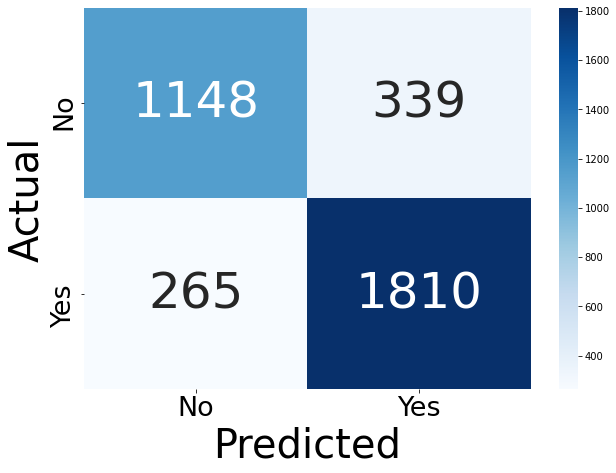

In [23]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary = True
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 
plt.savefig("KNN Matrix", bbox_inches="tight")

plt.show()